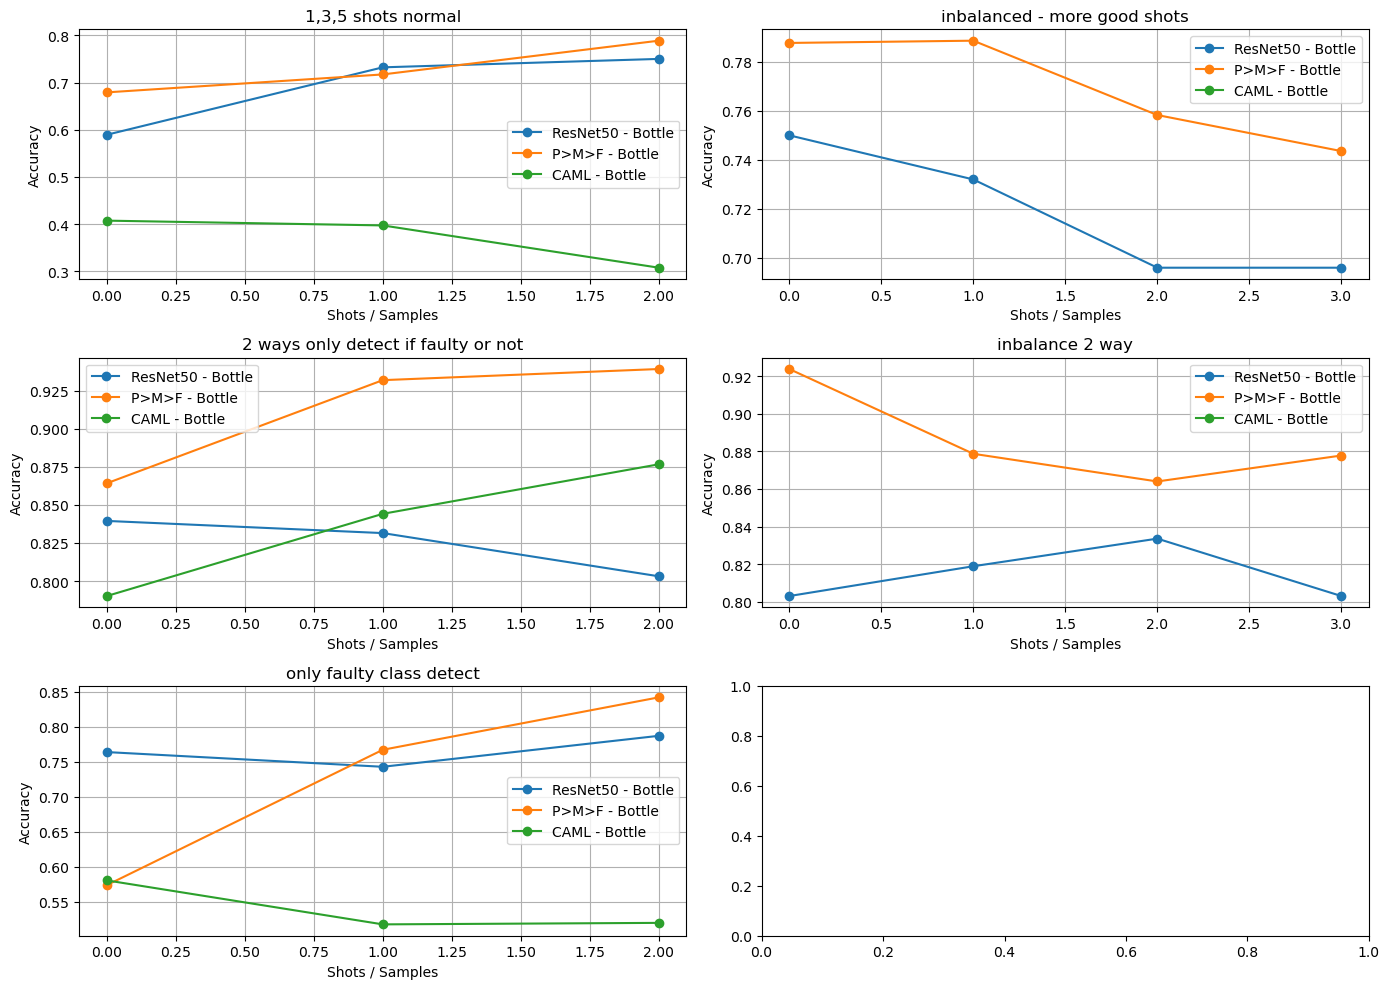

In [1]:
import matplotlib.pyplot as plt

# Define data
bottle_data = {
    "ResNet50": {
        "1,3,5 shots normal": [0.5892857142857143, 0.7321428571428571, 0.75],
        "inbalanced - more good shots": [0.75, 0.732, 0.696, 0.696],
        "2 ways only detect if faulty or not": [0.8395, 0.8315, 0.8031],
        "inbalance 2 way": [0.8031, 0.81893, 0.8336, 0.8031],
        "only faulty class detect": [0.7638, 0.7428, 0.787]
    },
    "P>M>F": {
        "1,3,5 shots normal": [0.67910401, 0.71710526, 0.78860294],
        "inbalanced - more good shots": [0.78768382, 0.78860294, 0.75827206, 0.74356618],
        "2 ways only detect if faulty or not": [0.86422306, 0.93201754, 0.93933824],
        "inbalance 2 way": [0.92371324, 0.87867647, 0.86397059, 0.87775735],
        "only faulty class detect": [0.57380952, 0.76705653, 0.84191176]
    },
    "CAML": {
        "1,3,5 shots normal": [0.40740741, 0.39726027, 0.30769231],
        "2 ways only detect if faulty or not": [0.79012346, 0.84415584, 0.87671233],
        "only faulty class detect": [0.58064516, 0.51785714, 0.52]
    }
}

cable_data = {
    "ResNet50": {
        "1,3,5 shots normal": [0.21808, 0.43815, 0.4321478],
        "inbalanced - more good shots": [0.4321478, 0.432986, 0.42340, 0.4464635],
        "2 ways only detect if faulty or not": [0.8592, 0.8772, 0.8495],
        "inbalance 2 way": [0.8495, 0.8180, 0.7460, 0.6846],
        "only faulty class detect": [0.240, 0.4740, 0.4805]
    },
    "P>M>F": {
        "1,3,5 shots normal": [0.25199021, 0.44388328, 0.46975059],
        "inbalanced - more good shots": [0.50425859, 0.48023277, 0.43118282, 0.41842534],
        "2 ways only detect if faulty or not": [0.79263485, 0.8707712, 0.86756514],
        "inbalance 2 way": [0.86966158, 0.80142425, 0.80961366, 0.66028834],
        "only faulty class detect": [0.24383256, 0.43800505, 0.51304563]
    },
    "CAML": {
        "1,3,5 shots normal": [0.24031008, 0.19834711, 0.15929204],
        "2 ways only detect if faulty or not": [0.57364341, 0.54545455, 0.59292035],
        "only faulty class detect": [0.12962963, 0.36363636, 0.58823529]
    }
}
# Prepare the data
measurement_types = [
    "1,3,5 shots normal",
    "inbalanced - more good shots",
    "2 ways only detect if faulty or not",
    "inbalance 2 way",
    "only faulty class detect"
]

models = ["ResNet50", "P>M>F", "CAML"]

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

# Loop through each measurement type
for i, measurement in enumerate(measurement_types):
    ax = axes[i]
    for model in models:
        # Get the bottle and cable data for the current measurement and model
        bottle_accuracy = bottle_data[model].get(measurement, [])
        cable_accuracy = cable_data[model].get(measurement, [])
        
        # Plot both bottle and cable data
        ax.plot(bottle_accuracy, marker='o', label=f'{model} - Bottle', linestyle='-')
        
    ax.set_title(measurement)
    ax.set_xlabel("Shots / Samples")
    ax.set_ylabel("Accuracy")
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


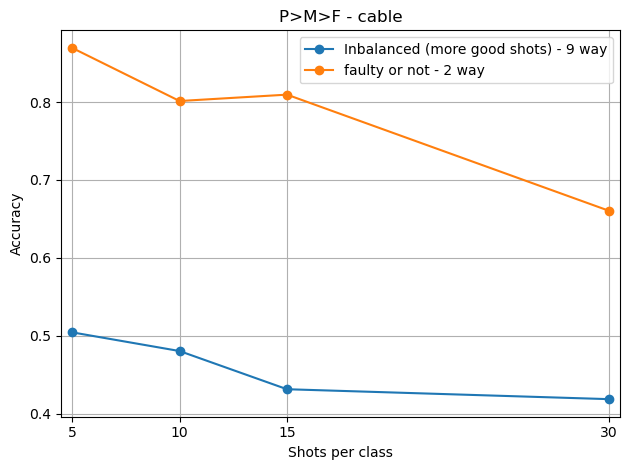

In [2]:
# Create subplots
fig, ax = plt.subplots()

# Loop through each measurement type
model = "P>M>F"
data = cable_data
imgclass = "cable"

# Plot both bottle and cable data
ax.plot([5,10,15, 30], data[model].get("inbalanced - more good shots", []), marker='o', label=f'Inbalanced (more good shots) - 9 way', linestyle='-')
ax.plot([5,10,15, 30], data[model].get("inbalance 2 way", []), marker='o', label=f'faulty or not - 2 way', linestyle='-')

ax.set_title(f'{model} - {imgclass}')
ax.set_xlabel("Shots per class")
ax.set_ylabel("Accuracy")
ax.legend()
ax.grid(True)

ax.set(xlim=(4.5, 30.5), xticks=[5,10,15, 30])

# Adjust layout
plt.tight_layout()
plt.savefig(f"{model}-{imgclass}-inbalanced.png")

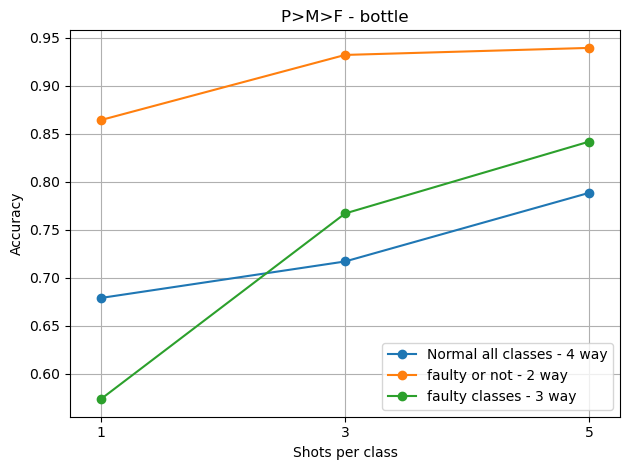

In [3]:
# Create subplots
fig, ax = plt.subplots()

# Loop through each measurement type
model = "P>M>F"
data = bottle_data
imgclass = "bottle"

# Plot both bottle and cable data
ax.plot([1,3,5], data[model].get("1,3,5 shots normal", []), marker='o', label=f'Normal all classes - 4 way', linestyle='-')
ax.plot([1,3,5], data[model].get("2 ways only detect if faulty or not", []), marker='o', label=f'faulty or not - 2 way', linestyle='-')
ax.plot([1,3,5], data[model].get("only faulty class detect", []), marker='o', label=f'faulty classes - 3 way', linestyle='-')

ax.set_title(f'{model} - {imgclass}')
ax.set_xlabel("Shots per class")
ax.set_ylabel("Accuracy")
ax.legend()
ax.grid(True)

ax.set(xlim=(0.75, 5.25), xticks=[1,3,5])

# Adjust layout
plt.tight_layout()
plt.savefig(f"{model}-{imgclass}.png")

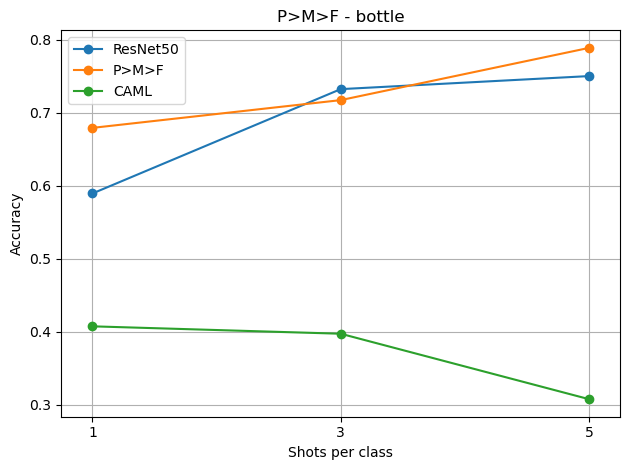

In [4]:
# Create subplots
fig, ax = plt.subplots()

# Loop through each measurement type
model = "P>M>F"
data = bottle_data
imgclass = "bottle"

# Plot both bottle and cable data
ax.plot([1,3,5], data["ResNet50"].get("1,3,5 shots normal", []), marker='o', label=f'ResNet50', linestyle='-')
ax.plot([1,3,5], data["P>M>F"].get("1,3,5 shots normal", []), marker='o', label=f'P>M>F', linestyle='-')
ax.plot([1,3,5], data["CAML"].get("1,3,5 shots normal", []), marker='o', label=f'CAML', linestyle='-')

ax.set_title(f'{model} - {imgclass}')
ax.set_xlabel("Shots per class")
ax.set_ylabel("Accuracy")
ax.legend()
ax.grid(True)

ax.set(xlim=(0.75, 5.25), xticks=[1,3,5])

# Adjust layout
plt.tight_layout()
plt.savefig(f"{model}-{imgclass}.png")

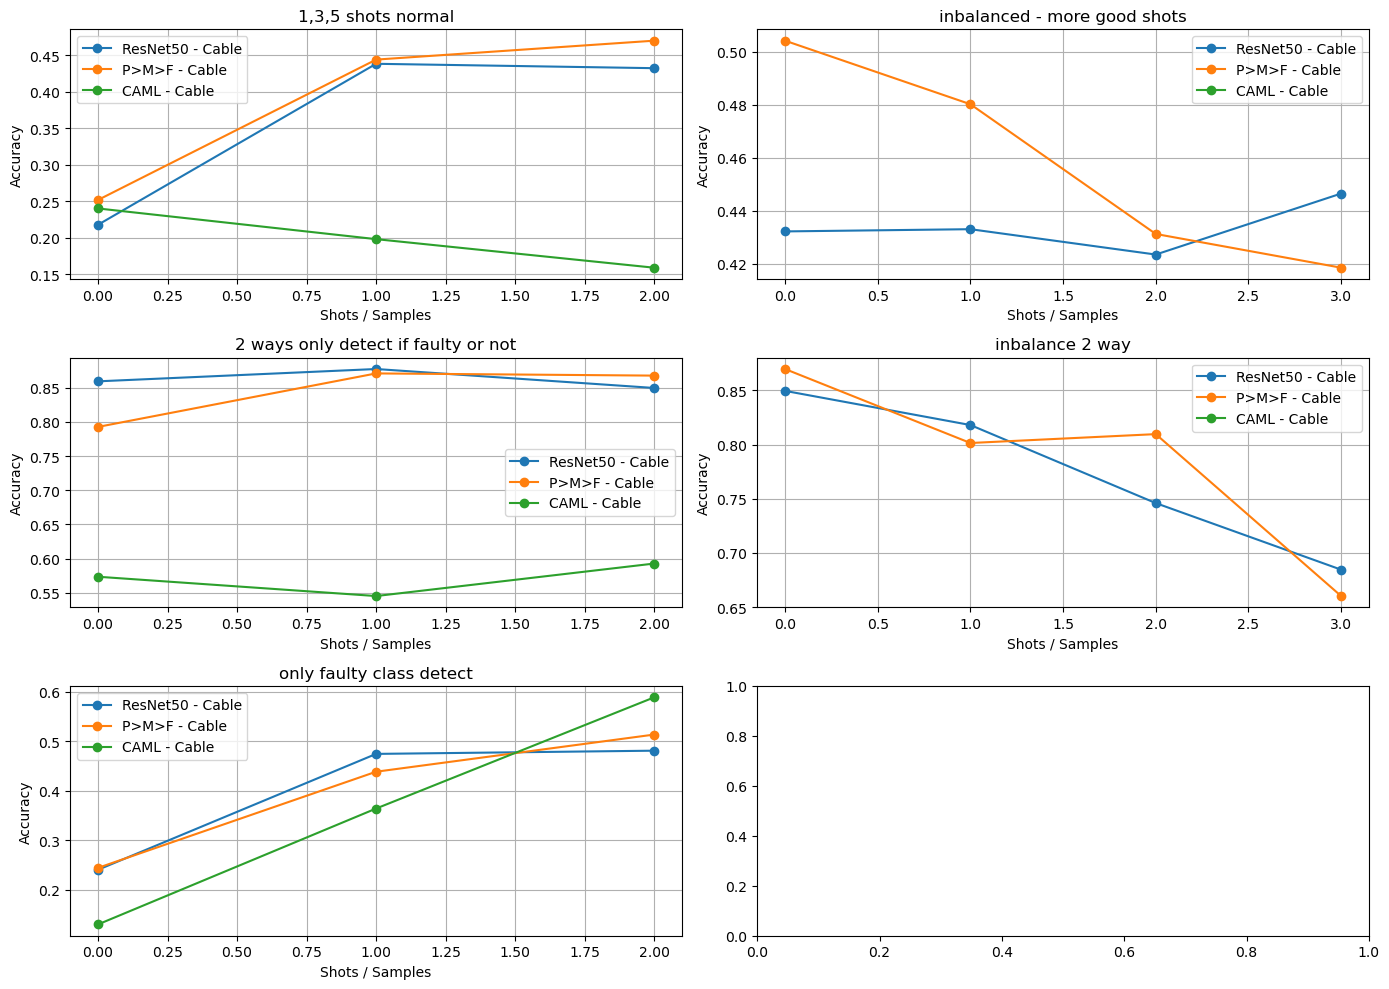

In [5]:
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

# Loop through each measurement type
for i, measurement in enumerate(measurement_types):
    ax = axes[i]
    for model in models:
        # Get the bottle and cable data for the current measurement and model
        bottle_accuracy = bottle_data[model].get(measurement, [])
        cable_accuracy = cable_data[model].get(measurement, [])
        
        # Plot both bottle and cable data
        ax.plot(cable_accuracy, marker='o', label=f'{model} - Cable', linestyle='-')
        
    ax.set_title(measurement)
    ax.set_xlabel("Shots / Samples")
    ax.set_ylabel("Accuracy")
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

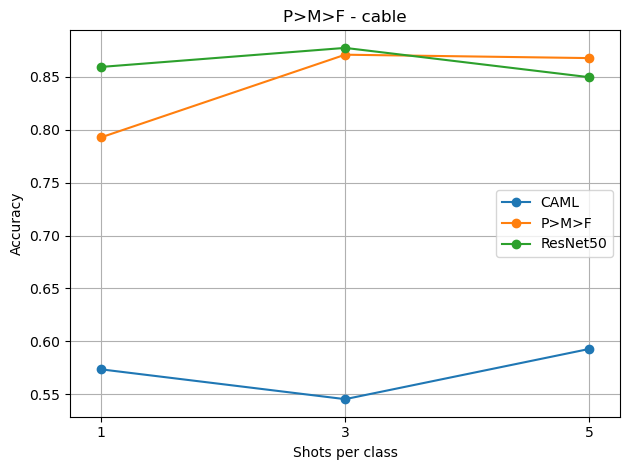

In [8]:
# Create subplots
fig, ax = plt.subplots()

# Loop through each measurement type
model = "P>M>F"
data = cable_data
imgclass = "cable"

# Plot both bottle and cable data
ax.plot([1,3,5], data["CAML"].get("2 ways only detect if faulty or not", []), marker='o', label=f'CAML', linestyle='-')
ax.plot([1,3,5], data["P>M>F"].get("2 ways only detect if faulty or not", []), marker='o', label=f'P>M>F', linestyle='-')
ax.plot([1,3,5], data["ResNet50"].get("2 ways only detect if faulty or not", []), marker='o', label=f'ResNet50', linestyle='-')


ax.set_title(f'{model} - {imgclass}')
ax.set_xlabel("Shots per class")
ax.set_ylabel("Accuracy")
ax.legend()
ax.grid(True)

ax.set(xlim=(0.75, 5.25), xticks=[1,3,5])

# Adjust layout
plt.tight_layout()
plt.savefig(f"comparison-2way-{imgclass}.png")